In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import pytorch_lightning as pl
import pytorch_lightning.loggers as pl_loggers
import pytorch_lightning.callbacks as pl_callbacks
import matplotlib.patches as patches
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.dataset import Dataset
import torchvision
from torchvision import transforms
import h5py  
from dataset import SOLODataset
import dataset
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
seed = 17
torch.manual_seed(seed);

In [2]:
# SOLODataset()

In [3]:
folder_path = "data/"
bboxes_file = "hw3_mycocodata_bboxes_comp_zlib.npy"
images_file = "hw3_mycocodata_img_comp_zlib.h5"
labels_file = "hw3_mycocodata_labels_comp_zlib.npy"
mask_file = "hw3_mycocodata_mask_comp_zlib.h5"


bboxes = dataset.load_data_np(folder_path + bboxes_file)
labels = dataset.load_data_np(folder_path + labels_file)
images = dataset.load_data_h5py(folder_path + images_file).astype("uint8").transpose((0,2,3,1))
masks = dataset.load_data_h5py(folder_path + mask_file).astype("uint8")
masks = np.expand_dims(masks,-1)
masks_unflattened = dataset.unflatten_masks(masks=masks, bboxes=bboxes)

In [106]:
def collate_fn(batch):
    images, labels, masks, bounding_boxes = list(zip(*batch))
    return torch.stack(images), labels, masks, bounding_boxes

batch_size = 16
train_dataset = SOLODataset(tensors=(images, bboxes, labels, masks_unflattened))
train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn) 

# TODO:
- Transform the coordinates of bbox
- Plot bounding boxes on image
- Plot mask on image

In [107]:
for image, label, mask, bbox in train_loader:
    # print(x)
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


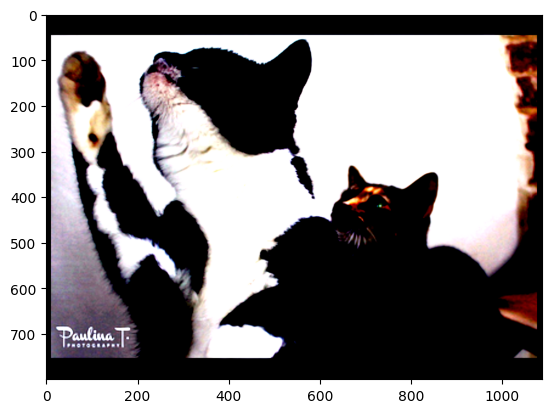

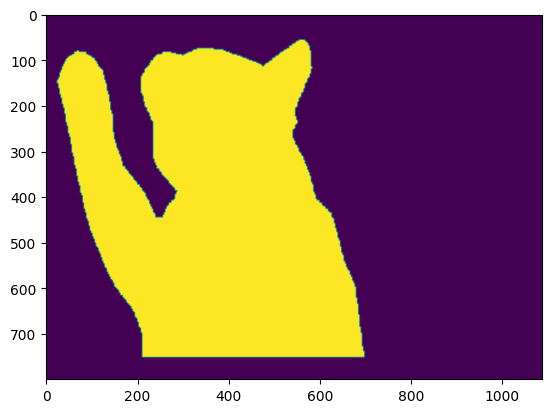

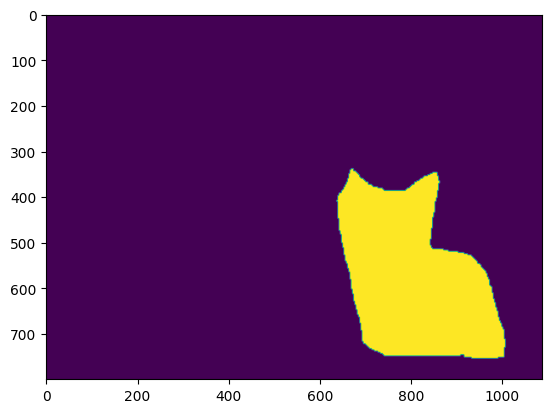

[3 3]
[[  23.825312   54.666668  698.90314   756.14996 ]
 [ 638.0745    337.15     1007.4768    757.      ]]


In [108]:
idx = 3

plt.imshow(image[idx].permute(1,2,0))
plt.show()
for msk in mask[idx]:
    plt.imshow(msk)
    plt.show()
print(label[idx])
print(bbox[idx])

In [109]:
#Plotting Image With Boxes
def plot_image_with_boxes(image,label, bbox):
  
  # plt.imshow(image)
  fig, ax = plt.subplots(figsize = (8,8))
  
  mapping = {1:"b",2:"g",3:"r"}
  label_mapping = {1 : "Vehicle", 2 : "People", 3 : "Animal"}
  ax.imshow(image)
  for i,box in enumerate(bbox):
    x1 = box[0]
    y1 = box[1]
    x2 = box[2]
    y2 = box[3]

    width = x2-x1
    height = y2-y1
    # print(height)
    rect = patches.Rectangle((x1, y1), width, height, linewidth=3, edgecolor=mapping[label[i]], facecolor='none')
    
    props = dict(boxstyle='round', facecolor=mapping[label[i]], alpha=0.5)
    # place a text box in upper left in axes coords
    ax.text(x1, y1-4, label_mapping[label[i]], fontsize=10, color="w",
        verticalalignment='top', bbox=props)
    ax.add_patch(rect)
  plt.show()

def apply_mask_to_image(image, masks, labels, alpha=.4):
    """Apply the given mask to the image.
    """
    image = image.copy()
    label_dict = {1:2,2:1,3:0}
    for i, mask in enumerate(masks):
        label = labels[i] 
        for channel in range(3):
            label = label_dict[labels[i]]
            if label == channel:
                color_factor = 1
            else:
                color_factor = 0
            image[:, :, channel] = np.where(mask > 0,
                                    image[:, :, channel] *
                                    (1 - alpha) + alpha * color_factor ,
                                    image[:, :, channel])
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


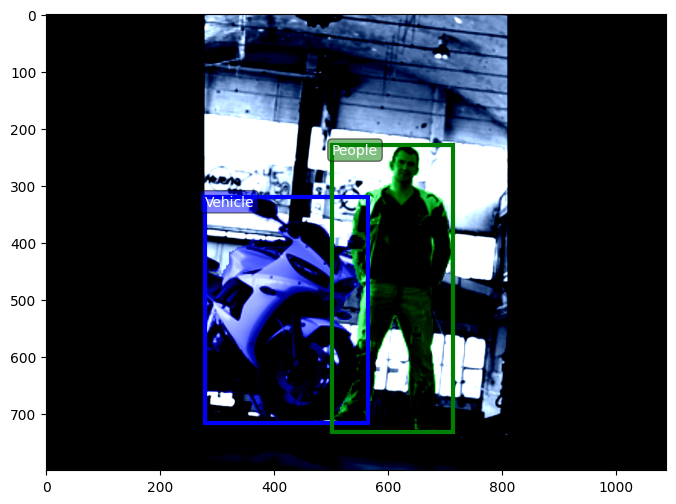

In [112]:
idx = 12
masked_image = apply_mask_to_image(image[idx].permute((1,2,0)).numpy(),mask[idx],label[idx], alpha=.6)
plot_image_with_boxes(masked_image,label[idx],bbox[idx])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


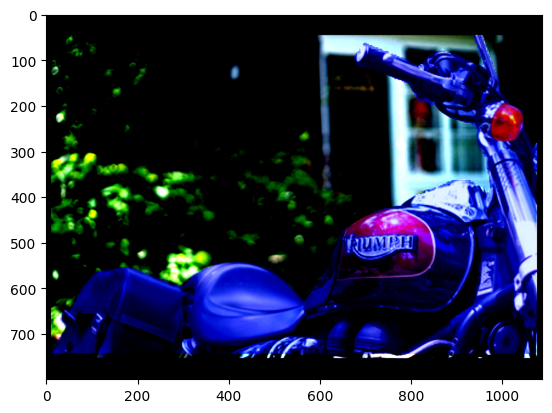

In [83]:
idx = 2
plt.imshow()

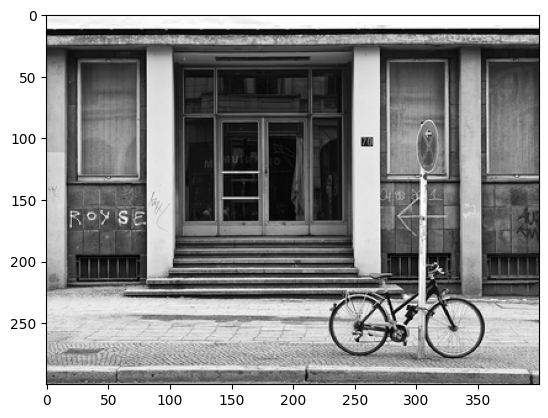

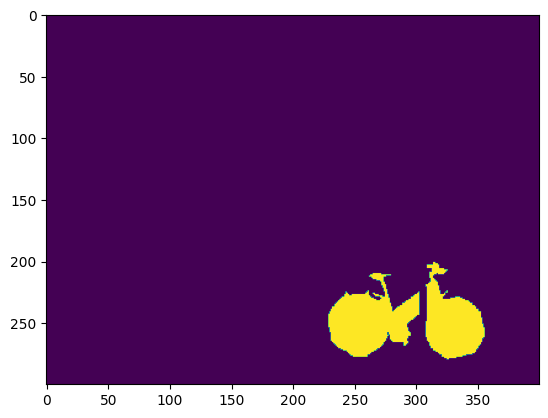

[1]
[[229.1875  201.00626 356.21875 280.175  ]]


In [13]:
idx = 21

plt.imshow(images[idx])
plt.show()
plt.imshow(masks_unflattened[idx][0])
plt.show()
print(labels[idx])
print(bboxes[idx])